# Import Required Libraries
Import the necessary libraries, including NumPy, Matplotlib, and SymPy.

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define the Periodic Function
Define the periodic function $f(x)$ with period $T$. Example: $f(x) = \sin(x)$.

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/var/folders/f_/zgh1n7tj6wqcgk47sst4brvw0000gn/T/ipykernel_29458/1163216583.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, y, label='$f(x) = \sin(x)$')


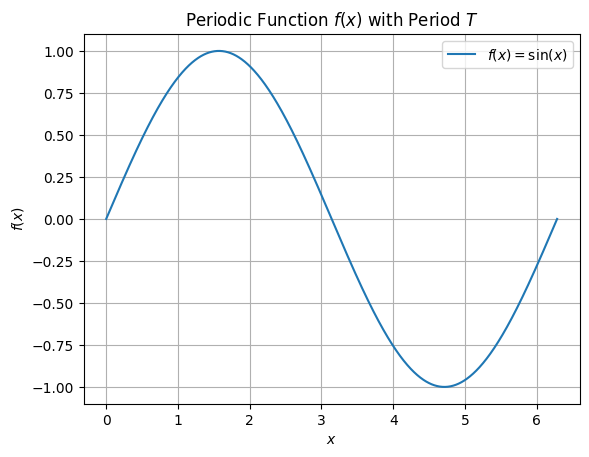

In [2]:
# Define the period T
T = 2 * np.pi

# Define the periodic function f(x)
def f(x):
    return np.sin(x)  # Example periodic function

# Generate x values
x = np.linspace(0, T, 1000)

# Compute the function values
y = f(x)

# Plot the function
plt.plot(x, y, label='$f(x) = \sin(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Periodic Function $f(x)$ with Period $T$')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the Fourier Coefficients
Calculate the Fourier coefficients $a_0$, $a_n$, and $b_n$ using integration. 

$$a_0 = \frac{2}{T} \int_{0}^{T} f(x) \, dx$$ 
$$a_n = \frac{2}{T} \int_{0}^{T} f(x) \cos\left(\frac{n 2 \pi x}{T}\right) \, dx$$ 
$$b_n = \frac{2}{T} \int_{0}^{T} f(x) \sin\left(\frac{n 2 \pi x}{T}\right) \, dx$$

In [ ]:
# Calculate the Fourier Coefficients

# Define the symbolic variable
x = sp.symbols('x')

# Define the period T
T = 2 * sp.pi

# Define the periodic function f(x)
f = sp.sin(x)  # Example periodic function

# Calculate a0
a0 = (2 / T) * sp.integrate(f, (x, 0, T))

# Calculate an
n = sp.symbols('n', integer=True)
an = (2 / T) * sp.integrate(f * sp.cos(n * 2 * sp.pi * x / T), (x, 0, T))

# Calculate bn
bn = (2 / T) * sp.integrate(f * sp.sin(n * 2 * sp.pi * x / T), (x, 0, T))

# Display the coefficients
a0, an, bn

# Construct the Fourier Series
Construct the Fourier series using the calculated coefficients. 

$$f(x) \approx \frac{a_0}{2} + \sum_{n=1}^{N} \left[ a_n \cos\left(\frac{n 2 \pi x}{T}\right) + b_n \sin\left(\frac{n 2 \pi x}{T}\right) \right]$$

In [ ]:
# Construct the Fourier Series

# Define the number of terms in the Fourier series
N = 10

# Define the Fourier series
fourier_series = a0 / 2  # Start with the a0 term

# Add the an and bn terms
for n_val in range(1, N + 1):
    an_val = an.subs(n, n_val)
    bn_val = bn.subs(n, n_val)
    fourier_series += an_val * sp.cos(n_val * 2 * sp.pi * x / T) + bn_val * sp.sin(n_val * 2 * sp.pi * x / T)

# Simplify the Fourier series
fourier_series = sp.simplify(fourier_series)

# Display the Fourier series
fourier_series

# LaTeX expression for the Fourier series
fourier_series_expr = sp.latex(fourier_series)
fourier_series_expr

# Visualize the Fourier Series
Use Matplotlib to visualize the original function and its Fourier series approximation.

In [ ]:
# Visualize the Fourier Series

# Convert the symbolic Fourier series to a numerical function
fourier_series_func = sp.lambdify(x, fourier_series, 'numpy')

# Generate x values
x_vals = np.linspace(0, float(T), 1000)

# Compute the Fourier series approximation values
y_fourier = fourier_series_func(x_vals)

# Plot the original function and its Fourier series approximation
plt.plot(x_vals, np.sin(x_vals), label='$\mathrm{Original\ function}\ f(x) = \sin(x)$')
plt.plot(x_vals, y_fourier, label='$\mathrm{Fourier\ series\ approximation}$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Original Function and Fourier Series Approximation')
plt.legend()
plt.grid(True)
plt.show()